In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import keras.optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras import callbacks

In [3]:
# no of rows that are removed from the dataset because 6th row wasn't their for that particular plane
rows_removed = 0  

#convert an array of calues into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    global rows_removed
    for i in range(len(dataset) - look_back-1):
        if (dataset[i + look_back][0] != dataset[i][0]):
            rows_removed = rows_removed + 1
            continue
        a = dataset[i:(i + look_back), 1:]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 1:])
    return np.array(dataX), np.array(dataY)

In [4]:
#fix random seed for reproducibility
np.random.seed(7)

In [5]:
from google.colab import files
uploaded = files.upload()

Saving new planes.csv to new planes.csv


In [6]:
#load the dataset
dataframe = read_csv("new planes.csv", engine='python')
dataset = dataframe.values
dataset = dataset.astype('int32')
print(dataset)

[[     0 -13594  -9455     27     82      0]
 [     0 -13925  -9255     71     82      4]
 [     0 -14265  -9055    117     84      8]
 ...
 [  2128 -12208  -8147     43     72    943]
 [  2128 -12374  -8447     27     72    948]
 [  2128 -12541  -8743     14     72    952]]


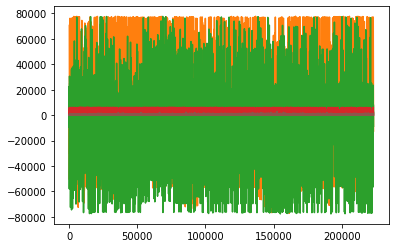

In [7]:
plt.plot(dataset)
plt.show()

In [8]:
#split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

#reshape into X=t and Y=t+1
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#print(rows_removed)
# print sample data
for i in range(0, 5):
  print(trainX[i], trainY[i])

#reshape input to be[ samples, time steps, features]
print(trainX.shape)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 5))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 5))

[[-13594  -9455     27     82      0]
 [-13925  -9255     71     82      4]
 [-14265  -9055    117     84      8]
 [-14615  -8853    163     86     13]
 [-14974  -8651    207     88     17]] [-15340  -8445    253     90     22]
[[-13925  -9255     71     82      4]
 [-14265  -9055    117     84      8]
 [-14615  -8853    163     86     13]
 [-14974  -8651    207     88     17]
 [-15340  -8445    253     90     22]] [-15716  -8231    305     91     26]
[[-14265  -9055    117     84      8]
 [-14615  -8853    163     86     13]
 [-14974  -8651    207     88     17]
 [-15340  -8445    253     90     22]
 [-15716  -8231    305     91     26]] [-16102  -8014    356     93     31]
[[-14615  -8853    163     86     13]
 [-14974  -8651    207     88     17]
 [-15340  -8445    253     90     22]
 [-15716  -8231    305     91     26]
 [-16102  -8014    356     93     31]] [-16494  -7800    403     95     35]
[[-14974  -8651    207     88     17]
 [-15340  -8445    253     90     22]
 [-15716  -8

In [9]:
#create and fit the LSTM Network
n_steps = 5
n_features = 5    # no of features are now = 5 in multiple parallel series
batch_size = 1
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(n_features))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')
model.fit(trainX, trainY, epochs=30, verbose=2, validation_data = (testX, testY), callbacks = callbacks.EarlyStopping(monitor='val_loss', patience = 3, restore_best_weights=True))

Epoch 1/30
4511/4511 - 46s - loss: 3941156.7500 - val_loss: 759392.5000
Epoch 2/30
4511/4511 - 21s - loss: 545666.4375 - val_loss: 387128.6875
Epoch 3/30
4511/4511 - 21s - loss: 342191.8125 - val_loss: 306810.6875
Epoch 4/30
4511/4511 - 21s - loss: 304473.5938 - val_loss: 300263.9062
Epoch 5/30
4511/4511 - 21s - loss: 197207.2812 - val_loss: 141839.5625
Epoch 6/30
4511/4511 - 21s - loss: 173134.5469 - val_loss: 111753.6719
Epoch 7/30
4511/4511 - 21s - loss: 94771.3359 - val_loss: 75610.0547
Epoch 8/30
4511/4511 - 21s - loss: 75233.9141 - val_loss: 63889.6914
Epoch 9/30
4511/4511 - 21s - loss: 75215.1562 - val_loss: 38418.0312
Epoch 10/30
4511/4511 - 22s - loss: 58745.3008 - val_loss: 59125.9805
Epoch 11/30
4511/4511 - 21s - loss: 39353.6953 - val_loss: 55015.1172
Epoch 12/30
4511/4511 - 22s - loss: 45107.3867 - val_loss: 33416.3633
Epoch 13/30
4511/4511 - 21s - loss: 27116.8066 - val_loss: 21639.8047
Epoch 14/30
4511/4511 - 21s - loss: 20028.2930 - val_loss: 13163.1875
Epoch 15/30
4511

In [10]:
#make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
#model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

(144347, 5) (144347, 5)
[[-1.5254806e+04 -8.3900752e+03  4.0064011e+02  5.4293125e+01
  -1.9980213e+01]
 [-1.5628794e+04 -8.1846138e+03  4.3719833e+02  5.4697762e+01
  -1.6783855e+01]
 [-1.6012210e+04 -7.9820845e+03  4.7476083e+02  5.4923462e+01
  -1.1817479e+01]
 ...
 [-2.9742346e+04 -6.8431617e+04  3.6913730e+03  1.8643887e+02
   2.3678201e+02]
 [-2.9942564e+04 -6.8984078e+04  3.6858098e+03  1.8857480e+02
   2.4324339e+02]
 [-3.0070197e+04 -6.9556414e+04  3.6794553e+03  1.9084021e+02
   2.4948683e+02]]
[[-15340  -8445    253     90     22]
 [-15716  -8231    305     91     26]
 [-16102  -8014    356     93     31]
 ...
 [-29708 -68376   3653    121    176]
 [-29892 -68917   3651    121    181]
 [-30010 -69477   3649    121    185]]
Train Score: 88.09 RMSE
Test Score: 87.16 RMSE


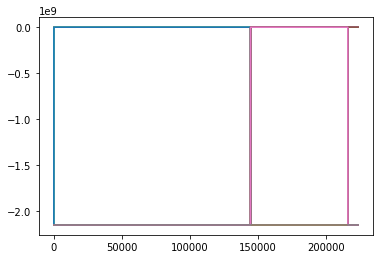

In [12]:
print(trainY.shape, trainPredict.shape)
print(trainPredict)
print(trainY)
#calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:], trainPredict[:]))
print("Train Score: %.2f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:], testPredict[:]))
print("Test Score: %.2f RMSE" % (testScore))


#shift train predictions for plotting 
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :5] = trainPredict

#shift test predictions for plottting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1: len(dataset)-1 - rows_removed, :5] = testPredict

#plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [19]:
# demonstrate prediction
x_input = np.array([[5000, 5000, 50, 105, 0], [6000, 6000, 75, 107, 5], [7800, 7000, 125, 109, 11], [9200, 8000, 160, 111, 22], [10000, 9000, 190, 113, 29]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[10392.1875   9720.224     186.18456    84.33436   146.13449]]
